# Predict sales revenue

Feature Descriptions
1. TV - Spend on TV Advertisements
2. Radio - Spend on radio Advertisements
3. Newspaper - Spend on newspaper Advertisements
4. Sales - Sales revenue generated

Sales is dependent / target variable

TV, Radio and Newspaper are independent variables

import numpy and pandas

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load Advertising data set

In [ ]:
pwd()

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv("/content/Advertising.csv")

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


First column is index and we do not need it. So remove the first column

In [ ]:
data = data[["TV", "Radio", "Newspaper", "Sales"]]

In [ ]:
#data = data.drop("Unnamed: 0", axis = 1)

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
import sklearn

In [ ]:
import sklearn
from sklearn.preprocessing import PowerTransformer # it is class to reduce skeude of the module
x = PowerTransformer() #used to make the data more Gaussian-like or closer to a normal distribution.
powerdata = pd.DataFrame(x.fit_transform(data))
powerdata.columns = data.columns
powerdata.head()

,TV,Radio,Newspaper,Sales
0,0.948674,0.962247,1.514335,1.464412
1,-1.191314,1.040179,0.787683,-0.650693
2,-1.647757,1.370710,1.516998,-0.894550
3,0.141020,1.142387,1.214656,0.882528
4,0.452715,-0.748651,1.211704,-0.134550


In [ ]:
import sklearn
from sklearn.preprocessing import PowerTransformer
x = PowerTransformer()
powerdata = pd.DataFrame(x.fit_transform(data))
powerdata.columns = data.columns
powerdata.head()

,TV,Radio,Newspaper,Sales
0,0.948674,0.962247,1.514335,1.464412
1,-1.191314,1.040179,0.787683,-0.650693
2,-1.647757,1.370710,1.516998,-0.894550
3,0.141020,1.142387,1.214656,0.882528
4,0.452715,-0.748651,1.211704,-0.134550


In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: xlabel='Radio', ylabel='Density'>

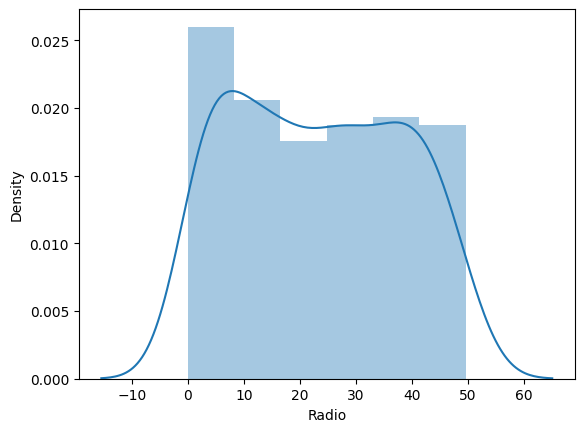

In [ ]:
sns.distplot(data['Radio'], kde = True)

In [ ]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
powerdata = pd.DataFrame(pt.fit_transform(data))
powerdata.columns = data.columns
powerdata.head()

,TV,Radio,Newspaper,Sales
0,0.948674,0.962247,1.514335,1.464412
1,-1.191314,1.040179,0.787683,-0.650693
2,-1.647757,1.370710,1.516998,-0.894550
3,0.141020,1.142387,1.214656,0.882528
4,0.452715,-0.748651,1.211704,-0.134550


<Axes: xlabel='TV', ylabel='Density'>

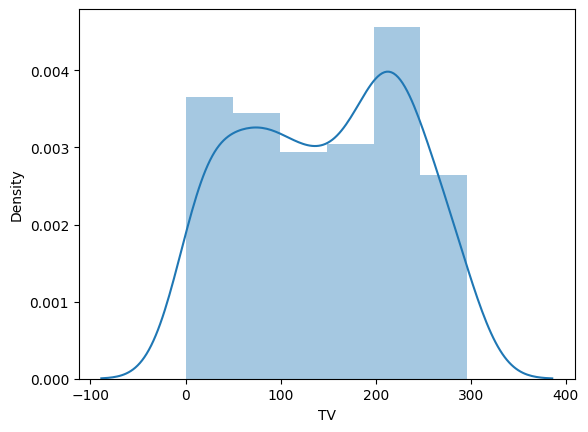

In [ ]:
sns.distplot(data['TV'],kde = True)

<Axes: xlabel='Newspaper', ylabel='Density'>

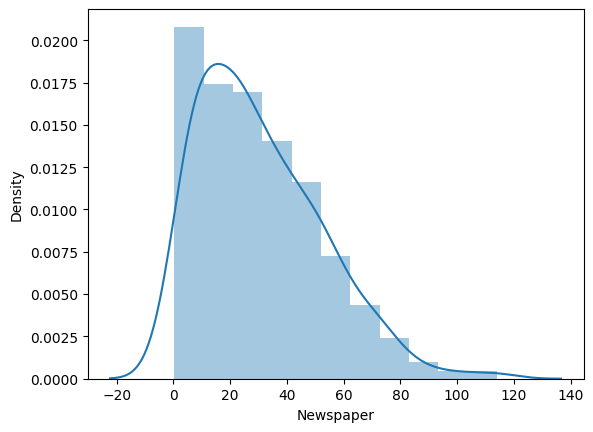

In [ ]:
sns.distplot(data['Newspaper'],kde=True)

<Axes: xlabel='Newspaper', ylabel='Density'>

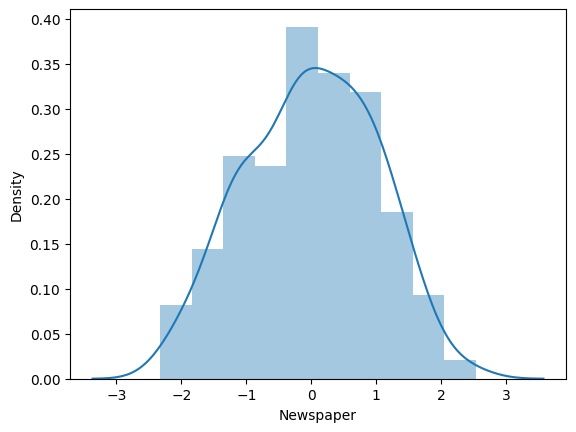

In [ ]:
sns.distplot(powerdata['Newspaper'],kde=True)

<Axes: xlabel='Newspaper', ylabel='Density'>

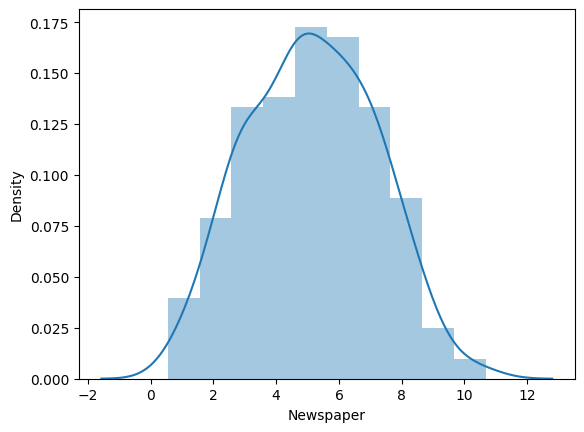

In [ ]:
sns.distplot(data['Newspaper']**0.5,kde=True)

In [ ]:
data['Newspaper'].skew()

0.8947204074986175

# Explore the data set

Is there a relationship between sales and spend various advertising channels?

Load matplotlib and seaborn libraries for visual analytics

# Visualize pairwise correlations

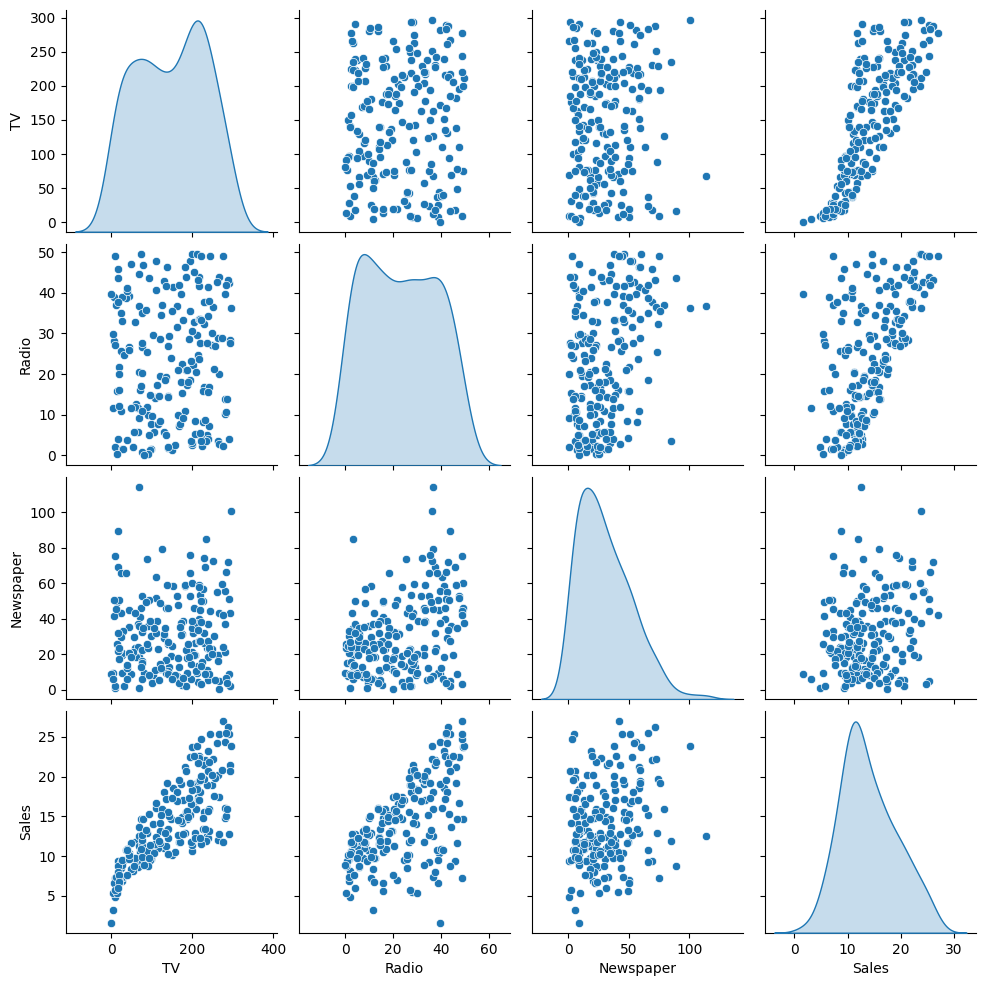

In [ ]:
sns.pairplot( data , diag_kind='kde')

Any observations from the above graph?

Calculate correlations

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Visualize the correlations

<Axes: >

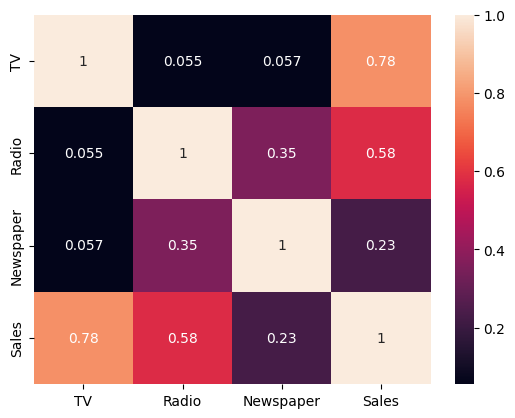

In [ ]:
sns.heatmap(data.corr(), annot = True)

<Axes: >

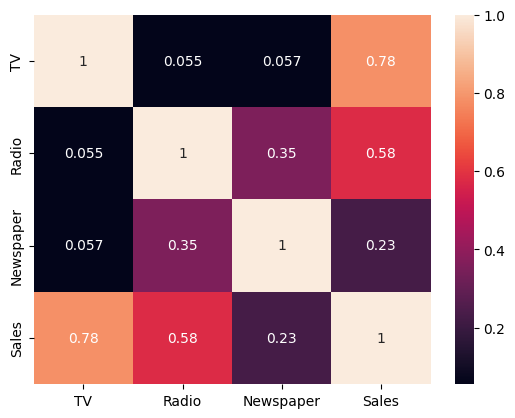

In [ ]:
sns.heatmap( data.corr(), annot=True)

Observations:
1. The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. We can observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and then between sales and radio i.e. 0.576.
2. Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probably candidates for model builing.

In [ ]:
from sklearn import metrics

In [ ]:
x = data[["TV","Radio"]]
y = data[["Sales"]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train, y_train)
print("Training R2")
print(model2.score(x_train,y_train))
print("Testing R2")
print(model2.score(x_test,y_test))

Training R2
0.9208213397821704
Testing R2
0.8354496662944217


In [ ]:
x = data[["TV","Radio"]]
y = data[["Sales"]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train, y_train)
#With TV,Radio
print("Training R2")
print(model2.score(x_train,y_train))
print("Testing R2")
print(model2.score(x_test,y_test))

Training R2
0.9208213397821703
Testing R2
0.8354496662944217


In [ ]:
print(model2.coef_)#The coef_ values show how much each feature contributes to the prediction
print(model2.intercept_) # the intercept_ value determines the starting point of the prediction line.

[[ 0.0437726   0.19343299 -0.00222879]]
[3.25409711]


In [ ]:
#With TV,Radio,Newspaper
print("Training R2")
print(model2.score(x_train,y_train))
print("Testing R2")
print(model2.score(x_test,y_test))

Training R2
0.9209087553499528
Testing R2
0.8353672324670594


In [ ]:
from sklearn.metrics import mean_squared_error
predicted = model2.predict(x_test) #The mean_squared_error function calculates the mean squared error between x_test and predicted, giving you a quantitative measure of how well the model's predictions match the actual target values.
print("RMSE") # RMSE is a measure of the differences between predicted values and observed values, providing a way to assess the accuracy of the model's predictions
print(np.sqrt(mean_squared_error(predicted, y_test)))

RMSE
1.398292489077775


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
sc = StandardScaler()
scaledXtrain = sc.fit_transform(x_train)
scaledXtest = sc.transform(x_test)
lr=LinearRegression()
lr.fit(scaledXtrain,y_train)
print("Training R2")
print(lr.score(scaledXtrain,y_train))
print("Testing R2")
print(lr.score(scaledXtest,y_test))
predicted = lr.predict(scaledXtest)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.8958528468776601
Testing R2
0.8947344950027067
RMSE
1.3982924890777741


In [ ]:
print(lr.coef_)

[[4.09521919 2.73481621]]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipe = Pipeline((
("pt", PowerTransformer()),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))
predicted = pipe.predict(x_test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9193095483243767
Testing R2
0.8626309076199543
RMSE
2.3645012695437657


In [ ]:
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer
from sklearn.metrics import mean_squared_error
poly = PolynomialFeatures(degree=3)
polyXtrain = poly.fit_transform(x_train)
polyXtest = poly.transform(x_test)
lr=LinearRegression()
lr.fit(polyXtrain,y_train)
print("Training R2")
print(lr.score(polyXtrain,y_train))
print("Testing R2")
print(lr.score(polyXtest,y_test))
predicted = lr.predict(polyXtest)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9908688938084677
Testing R2
0.9917493901619217
RMSE
0.3914695718547267


In [ ]:
temp = pd.DataFrame(polyXtrain)
temp['sales'] = y_train
temp.head()

,0,1,2,3,4,5,6,7,8,9,sales
0,1.0,13.1,0.4,171.61,5.24,0.16,2248.091,68.644,2.096,0.064,22.1
1,1.0,90.4,0.3,8172.16,27.12,0.09,738763.264,2451.648,8.136,0.027,10.4
2,1.0,18.7,12.1,349.69,226.27,146.41,6539.203,4231.249,2737.867,1771.561,9.3
3,1.0,204.1,32.9,41656.81,6714.89,1082.41,8502154.921,1370509.049,220919.881,35611.289,18.5
4,1.0,7.3,28.1,53.29,205.13,789.61,389.017,1497.449,5764.153,22188.041,NaN


With Newspaper Model is more overfit

In [ ]:
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer
from sklearn.metrics import mean_squared_error
pt = PowerTransformer()
poly = PolynomialFeatures(degree=1)
powerXtrain = pt.fit_transform(x_train)
powerXtest = pt.transform(x_test)
polyXtrain = poly.fit_transform(powerXtrain)
polyXtest = poly.transform(powerXtest)
lr=LinearRegression()
lr.fit(polyXtrain,y_train)
print("Training R2")
print(lr.score(polyXtrain,y_train))
print("Testing R2")
print(lr.score(polyXtest,y_test))
predicted = lr.predict(polyXtest)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9096987246658746
Testing R2
0.9059180802510014
RMSE
1.321928820243303


In [ ]:
x = data[["TV","Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipe = Pipeline((
("poly", PolynomialFeatures(degree=4)),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))
predicted = pipe.predict(x_test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9938509281412332
Testing R2
0.9871238130310765
RMSE
0.48907439407792475


In [ ]:
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(pipe,x_train,y_train,cv=10)
print(scoreslr)

[0.95755409 0.99382409 0.99755719 0.99543893 0.99046288 0.99681441
 0.99426474 0.99317884 0.99293526 0.99134493]


In [ ]:
import numpy as np
np.mean(scoreslr)

0.9903375346874406

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
pt = PowerTransformer()
powerXtrain = pt.fit_transform(x_train)
powerXtest = pt.transform(x_test)
lr=LinearRegression()
lr.fit(powerXtrain,y_train)
print("Training R2")
print(lr.score(powerXtrain,y_train))
print("Testing R2")
print(lr.score(powerXtest,y_test))
predicted = lr.predict(powerXtest)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9202468309343568
Testing R2
0.8294733543226074
RMSE
1.779825452481862


In [ ]:
x = data[["TV","Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))
predicted = pipe.predict(x_test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9096987246658746
Testing R2
0.9059180802510014
RMSE
1.321928820243303


In [ ]:
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(pipe,x_train,y_train,cv=10)
print(scoreslr)
np.mean(scoreslr)

[0.93807598 0.91115434 0.90104423 0.86974096 0.85498007 0.90722088
 0.91794667 0.89115696 0.96299336 0.87245304]


0.9026766481416623

In [ ]:
x = data[["TV","Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipe = Pipeline((
("poly",PolynomialFeatures(degree=3)),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))
predicted = pipe.predict(x_test)

Training R2
0.9908688938084677
Testing R2
0.9917493901625517



GradientBoostingRegressor is a machine learning technique that helps predict or estimate numerical values (like prices, quantities, etc.) by combining many simpler models, called decision trees. It works by learning from its mistakes in predicting and continuously improving to make more accurate predictions. In simple terms, it's like having a team of advisors, each specializing in different aspects, who learn from each other's mistakes to collectively make better decisions.

In [ ]:
x = data[["TV","Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipe = Pipeline((
("lr", GradientBoostingRegressor(n_estimators=500)),
#("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))
predicted = pipe.predict(x_test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9999774028558083
Testing R2
0.9796426489901531
RMSE
0.6149157518665913


In [ ]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
X = data[["TV","Radio"]]
y = data[["Sales"]]
param_range = np.arange(1,1000,50)
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(), X, y, param_name="n_estimators", param_range=param_range,
    n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting Regressor")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


KeyboardInterrupt: ignored

Automatically created module for IPython interactive environment


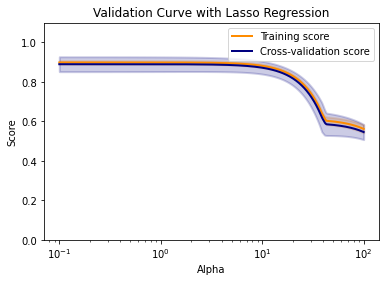

In [ ]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Lasso
X = data[["TV","Radio"]]
y = data[["Sales"]]
param_range = np.arange(0.1,100,0.1)
train_scores, test_scores = validation_curve(
    Lasso(), X, y, param_name="alpha", param_range=param_range,
    n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Lasso Regression")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
#Hyperparameter Tuning
#Find out the ideal value of alpha
from sklearn.model_selection import GridSearchCV
params = {'alpha': np.arange(0.01,2,0.01)}
model = Lasso()
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)

Best Hyper Parameters: {'alpha': 0.01}
